In [42]:
import sys
import cv2
import os
import numpy as np
from sys import platform
import argparse
import time

photo_dir = 'C:\\Users\\weightwater\\Desktop\\final\\openpose\\openpose\\openpose-1.7.0\\examples\\media\\COCO_val2014_000000000192.jpg'
model_dir = 'C:\\Users\\weightwater\\Desktop\\final\\openpose\\openpose\\openpose-1.7.0\\models'
sys_dir = 'C:\\Users\\weightwater\\Desktop\\final\\openpose\\openpose\\openpose-1.7.0\\build\\python\\openpose\\Debug'
os_dir = ';' + 'C:\\Users\\weightwater\\Desktop\\final\\openpose\\openpose\\openpose-1.7.0\\build\\x64\\Debug;' + 'C:\\Users\\weightwater\\Desktop\\final\\openpose\\openpose\\openpose-1.7.0\\build\\bin'

try:
    # Change these variables to point to the correct folder (Release/x64 etc.)
    sys.path.append(sys_dir)
    os.environ['PATH']  = os.environ['PATH'] + os_dir
    import pyopenpose as op
    params = dict()
    params["model_folder"] = model_dir
    params["net_resolution"] = '160x80'
    params['num_gpu'] = 1
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    print(e)
    sys.exit(-1)


def get_pose(image, show_img=False):
    opWrapper = op.WrapperPython()
    opWrapper.configure(params)
    opWrapper.start()

    # Process Image
    datum = op.Datum()
#     imageToProcess = cv2.imread(args[0].image_path)
    imageToProcess = image
    datum.cvInputData = imageToProcess
    opWrapper.emplaceAndPop(op.VectorDatum([datum]))
    # Display Image
#     print("Body keypoints: \n" + str(datum.poseKeypoints))

    if show_img:
        cv2.imshow('result', datum.cvOutputData)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    # return datum.poseKeypoints.tolist()
    return datum

# test_image = cv2.imread(photo_dir)
# res = get_pose(test_image, show_img=True)
# print(np.array(res).shape)


In [55]:
pelicuals = r'C:\Users\weightwater\Desktop\final\dataset\Peliculas\Peliculas\fights\newfi87.avi'
rwf2000 = r'C:\Users\weightwater\Desktop\final\dataset\RWF2000\RWF-2000\RWF-2000\train\Fight\6mrIIcAQ2fI_3.avi'
fdsd = r'C:\Users\weightwater\Desktop\final\dataset\fight-detection-surv-dataset-master\fight\fi071.mp4'
vvv = r'C:\Users\weightwater\Desktop\final\dataset\data\Videos\Violent_00026.mp4'

In [24]:
test_vedio = vvv

cap = cv2.VideoCapture(test_vedio)
num_frame = int(cap.get(7))
print(cap.get(3), cap.get(4))

opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Image
datum = op.Datum()

for i in range(num_frame):
    ret, frame = cap.read()
    
    datum.cvInputData = frame
    opWrapper.emplaceAndPop(op.VectorDatum([datum]))

    cv2.imshow('res', datum.cvOutputData)
    print(datum.poseKeypoints)
    print(datum.poseKeypoints.shape)
    k = cv2.waitKey(30)
    if k == ord('q'):
        break        

cv2.destroyAllWindows()
    

840.0 472.0
[[[4.43759369e+02 8.45025482e+01 8.58135581e-01]
  [4.08250580e+02 1.20623955e+02 9.38361466e-01]
  [3.96040009e+02 1.20405846e+02 9.51223791e-01]
  [3.59952911e+02 1.68153717e+02 1.01523888e+00]
  [3.72233368e+02 2.16427032e+02 9.13371623e-01]
  [4.44047974e+02 1.26304474e+02 8.57529521e-01]
  [4.43684265e+02 1.68667877e+02 2.10377336e-01]
  [4.49816437e+02 2.16108948e+02 1.83909863e-01]
  [4.07978271e+02 2.22456238e+02 8.98229957e-01]
  [4.01635315e+02 2.28143951e+02 8.99418175e-01]
  [4.02032257e+02 3.11890991e+02 9.56226528e-01]
  [3.95871460e+02 3.96016052e+02 8.66087317e-01]
  [4.25975159e+02 2.22366699e+02 8.31982255e-01]
  [4.07933685e+02 3.06379456e+02 9.41765070e-01]
  [3.72002869e+02 3.66108826e+02 8.45056713e-01]
  [4.26081696e+02 7.84152222e+01 8.70458126e-01]
  [4.44091034e+02 7.83542862e+01 8.35527062e-01]
  [4.08107941e+02 7.86355743e+01 9.04085279e-01]
  [4.49540131e+02 7.85734940e+01 1.32564574e-01]
  [3.96067017e+02 3.96000549e+02 5.21837354e-01]
  [3.960

In [103]:
import torch
import numpy as np
import math
import json

# read node information from json data 
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = f.read()
    data = json.loads(data)
    res = []
    for item in data['people']:
        res.append([item['pose_keypoints_2d'][i*3: i*3+3] for i in range(len(item['pose_keypoints_2d']) // 3)])
    return res


# caculate distance and angle between nodes
def pointDistance(keyPoint):
    """
    :param keyPoint:
    :return:list
    :distance:
    """
    distance0 = (keyPoint[4][0] - keyPoint[9][0]) ** 2 + (keyPoint[4][1] - keyPoint[9][1]) ** 2
    distance1 = (keyPoint[7][0] - keyPoint[12][0]) ** 2 + (keyPoint[7][1] - keyPoint[12][1]) ** 2
    distance2 = (keyPoint[2][0] - keyPoint[4][0]) ** 2 + (keyPoint[2][1] - keyPoint[4][1]) ** 2
    distance3 = (keyPoint[5][0] - keyPoint[7][0]) ** 2 + (keyPoint[5][1] - keyPoint[7][1]) ** 2
    distance4 = (keyPoint[0][0] - keyPoint[4][0]) ** 2 + (keyPoint[0][1] - keyPoint[4][1]) ** 2
    distance5 = (keyPoint[0][0] - keyPoint[7][0]) ** 2 + (keyPoint[0][1] - keyPoint[7][1]) ** 2
    distance6 = (keyPoint[4][0] - keyPoint[10][0]) ** 2 + (keyPoint[4][1] - keyPoint[10][1]) ** 2
    distance7 = (keyPoint[7][0] - keyPoint[13][0]) ** 2 + (keyPoint[7][1] - keyPoint[13][1]) ** 2
    distance8 = (keyPoint[4][0] - keyPoint[7][0]) ** 2 + (keyPoint[4][1] - keyPoint[7][1]) ** 2
    distance9 = (keyPoint[11][0] - keyPoint[14][0]) ** 2 + (keyPoint[11][1] - keyPoint[14][1]) ** 2
    distance10 = (keyPoint[10][0] - keyPoint[13][0]) ** 2 + (keyPoint[10][1] - keyPoint[13][1]) ** 2
    distance11 = (keyPoint[6][0] - keyPoint[10][0]) ** 2 + (keyPoint[6][1] - keyPoint[10][1]) ** 2
    distance12 = (keyPoint[3][0] - keyPoint[13][0]) ** 2 + (keyPoint[3][1] - keyPoint[13][1]) ** 2
    distance13 = (keyPoint[4][0] - keyPoint[23][0]) ** 2 + (keyPoint[4][1] - keyPoint[23][1]) ** 2
    distance14 = (keyPoint[7][0] - keyPoint[20][0]) ** 2 + (keyPoint[7][1] - keyPoint[20][1]) ** 2

    return [distance0, distance1, distance2, distance3, distance4, distance5, distance6, distance7,
            distance8, distance9, distance10, distance11, distance12, distance13, distance14]


# caculate distance and angle between nodes
def pointAngle(keyPoint):
    angle0 = __myAngle(keyPoint[2], keyPoint[3], keyPoint[4])
    angle1 = __myAngle(keyPoint[5], keyPoint[6], keyPoint[7])
    angle2 = __myAngle(keyPoint[9], keyPoint[10], keyPoint[11])
    angle3 = __myAngle(keyPoint[12], keyPoint[13], keyPoint[14])
    angle4 = __myAngle(keyPoint[3], keyPoint[2], keyPoint[1])
    angle5 = __myAngle(keyPoint[6], keyPoint[5], keyPoint[1])
    angle6 = __myAngle(keyPoint[10], keyPoint[8], keyPoint[13])
    angle7 = __myAngle(keyPoint[7], keyPoint[12], keyPoint[13])
    angle8 = __myAngle(keyPoint[4], keyPoint[9], keyPoint[10])
    angle9 = __myAngle(keyPoint[4], keyPoint[0], keyPoint[7])
    angle10 = __myAngle(keyPoint[4], keyPoint[8], keyPoint[7])
    angle11 = __myAngle(keyPoint[1], keyPoint[8], keyPoint[13])
    angle12 = __myAngle(keyPoint[1], keyPoint[8], keyPoint[10])
    angle13 = __myAngle(keyPoint[4], keyPoint[1], keyPoint[8])
    angle14 = __myAngle(keyPoint[7], keyPoint[1], keyPoint[8])

    return [angle0, angle1, angle2, angle3, angle4, angle5, angle6, angle7,
            angle8, angle9, angle10, angle11, angle12, angle13, angle14]


# calulate cos
def __myAngle(A, B, C):
    c = math.sqrt((A[0] - B[0]) ** 2 + (A[1] - B[1]) ** 2)
    a = math.sqrt((B[0] - C[0]) ** 2 + (B[1] - C[1]) ** 2)
    b = math.sqrt((A[0] - C[0]) ** 2 + (A[1] - C[1]) ** 2)
    if 2 * a * c != 0:
        return (a ** 2 + c ** 2 - b ** 2) / (2 * a * c)
    return 0


def get_dis_ang(data):
    res = []
    for people in data:
        distance = pointDistance(people)
        angle = pointAngle(people)
        res.append((distance, angle))

    return res


def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma


# calculate the input of CNN which is a tensor
# return t is a tensor
def get_x(data):
    # print(data)
    dis_ang = get_dis_ang(data)
    t = []
    for dis, ang in dis_ang:
        st_dis = standardization(np.array(dis))

        t_dis = torch.from_numpy(st_dis)
        t_ang = torch.tensor(st_dis)
        tmp = torch.cat((t_dis, t_ang))
        tmp = tmp.view(len(tmp), 1)
        t.append(tmp)
        
    return t


# input the json filepath, and the function will 
# one json data correspond to one frame of data


def analysis_json(filepath):
    # 加载数据
    data = read_json(filepath)
    
    # 数据预处理，得到神经网络的输入
    items = []
    for people in get_x(data):
        print
        items.append(people.numpy().T[0])

    # 加载模型
    net = twentyclassification(30, 200, 300, 100, 2)
    net.load_state_dict(torch.load('./23classification_eigenvalue.pth'))

    # 预测
    items = torch.tensor(items)
    if len(items) == 0:
        return []
    out = net(items.float())

    _, predicted = torch.max(out, 1)
    
    return predicted

def check_fight0(image):
    data = get_pose(image)
    
    items = []
    for people in get_x(data):
        items.append(people.numpy().T[0])
    
    net = twentyclassification(30, 200, 300, 100, 2)
    net.load_state_dict(torch.load('./23classification_eigenvalue.pth'))

    # 预测
    items = torch.tensor(items)
    if len(items) == 0:
        return []
    out = net(items.float())

    _, predicted = torch.max(out, 1)
    
    return predicted
    


# for item in get_x('./pose0.json'):  
#     print(item)


In [41]:
def check_fight(data):
    items = []
    for people in get_x(data):
        items.append(people.numpy().T[0])
    
    net = twentyclassification(30, 200, 300, 100, 2)
    net.load_state_dict(torch.load('./23classification_eigenvalue.pth'))

    # 预测
    items = torch.tensor(items)
    if len(items) == 0:
        return []
    out = net(items.float())

    _, predicted = torch.max(out, 1)
    
    return predicted

In [ ]:
img = cv2.imread(photo_dir)
res = check_fight(img)
# print(res)

In [44]:
test_vedio = r'C:\Users\weightwater\Desktop\final\dataset\RWF2000\RWF-2000\RWF-2000\train\Fight\3kpviz7lAMY_0.avi'

def testInCamera():
    # build openpose object
    opWrapper = op.WrapperPython()
    opWrapper.configure(params)
    opWrapper.start()

    # Process Image
    datum = op.Datum()
    
    # build network
    net = twentyclassification(30, 200, 300, 100, 2)
    net.load_state_dict(torch.load('./23classification_eigenvalue.pth'))
    
    capture = cv2.VideoCapture(0)
    print(capture.get(3), capture.get(4))

    while True:
        ret, frame = capture.read()
        # frame = cv2.flip(frame, 1)
        
        if not ret:
            break
        
        key = cv2.pollKey()
        if key != -1:
            cv2.destroyWindow("vedio")
            break
        
        datum.cvInputData = frame
        opWrapper.emplaceAndPop(op.VectorDatum([datum]))
        
        # print(datum.poseKeypoints)
        cv2.imshow("vedio", datum.cvOutputData)
    
    cv2.destroyAllWindows()
        
testInCamera()
        

640.0 480.0


In [1]:
import torch
import numpy as np
import math
import json


def read_json(file_path):
    with open(file_path, 'r') as f:
        data = f.read()
    data = json.loads(data)
    res = []
    for item in data['people']:
        tmp = [item['pose_keypoints_2d'][i*3: i*3+3] for i in range(len(item['pose_keypoints_2d']) // 3)]
        
        counts0 = sum(1 if p == 0 else 0 for p in [item['pose_keypoints_2d']][0])
        if counts0 > 10:
            continue
        res.append(tmp)
        
    return res


def pointDistance(keyPoint):
    """
    :param keyPoint:
    :return:list
    :distance:
    """
    distance0 = (keyPoint[4][0] - keyPoint[9][0]) ** 2 + (keyPoint[4][1] - keyPoint[9][1]) ** 2
    distance1 = (keyPoint[7][0] - keyPoint[12][0]) ** 2 + (keyPoint[7][1] - keyPoint[12][1]) ** 2
    distance2 = (keyPoint[2][0] - keyPoint[4][0]) ** 2 + (keyPoint[2][1] - keyPoint[4][1]) ** 2
    distance3 = (keyPoint[5][0] - keyPoint[7][0]) ** 2 + (keyPoint[5][1] - keyPoint[7][1]) ** 2
    distance4 = (keyPoint[0][0] - keyPoint[4][0]) ** 2 + (keyPoint[0][1] - keyPoint[4][1]) ** 2
    distance5 = (keyPoint[0][0] - keyPoint[7][0]) ** 2 + (keyPoint[0][1] - keyPoint[7][1]) ** 2
    distance6 = (keyPoint[4][0] - keyPoint[10][0]) ** 2 + (keyPoint[4][1] - keyPoint[10][1]) ** 2
    distance7 = (keyPoint[7][0] - keyPoint[13][0]) ** 2 + (keyPoint[7][1] - keyPoint[13][1]) ** 2
    distance8 = (keyPoint[4][0] - keyPoint[7][0]) ** 2 + (keyPoint[4][1] - keyPoint[7][1]) ** 2
    distance9 = (keyPoint[11][0] - keyPoint[14][0]) ** 2 + (keyPoint[11][1] - keyPoint[14][1]) ** 2
    distance10 = (keyPoint[10][0] - keyPoint[13][0]) ** 2 + (keyPoint[10][1] - keyPoint[13][1]) ** 2
    distance11 = (keyPoint[6][0] - keyPoint[10][0]) ** 2 + (keyPoint[6][1] - keyPoint[10][1]) ** 2
    distance12 = (keyPoint[3][0] - keyPoint[13][0]) ** 2 + (keyPoint[3][1] - keyPoint[13][1]) ** 2
    distance13 = (keyPoint[4][0] - keyPoint[23][0]) ** 2 + (keyPoint[4][1] - keyPoint[23][1]) ** 2
    distance14 = (keyPoint[7][0] - keyPoint[20][0]) ** 2 + (keyPoint[7][1] - keyPoint[20][1]) ** 2

    return [distance0, distance1, distance2, distance3, distance4, distance5, distance6, distance7,
            distance8, distance9, distance10, distance11, distance12, distance13, distance14]


def pointAngle(keyPoint):
    angle0 = __myAngle(keyPoint[2], keyPoint[3], keyPoint[4])
    angle1 = __myAngle(keyPoint[5], keyPoint[6], keyPoint[7])
    angle2 = __myAngle(keyPoint[9], keyPoint[10], keyPoint[11])
    angle3 = __myAngle(keyPoint[12], keyPoint[13], keyPoint[14])
    angle4 = __myAngle(keyPoint[3], keyPoint[2], keyPoint[1])
    angle5 = __myAngle(keyPoint[6], keyPoint[5], keyPoint[1])
    angle6 = __myAngle(keyPoint[10], keyPoint[8], keyPoint[13])
    angle7 = __myAngle(keyPoint[7], keyPoint[12], keyPoint[13])
    angle8 = __myAngle(keyPoint[4], keyPoint[9], keyPoint[10])
    angle9 = __myAngle(keyPoint[4], keyPoint[0], keyPoint[7])
    angle10 = __myAngle(keyPoint[4], keyPoint[8], keyPoint[7])
    angle11 = __myAngle(keyPoint[1], keyPoint[8], keyPoint[13])
    angle12 = __myAngle(keyPoint[1], keyPoint[8], keyPoint[10])
    angle13 = __myAngle(keyPoint[4], keyPoint[1], keyPoint[8])
    angle14 = __myAngle(keyPoint[7], keyPoint[1], keyPoint[8])

    return [angle0, angle1, angle2, angle3, angle4, angle5, angle6, angle7,
            angle8, angle9, angle10, angle11, angle12, angle13, angle14]


def __myAngle(A, B, C):
    c = math.sqrt((A[0] - B[0]) ** 2 + (A[1] - B[1]) ** 2)
    a = math.sqrt((B[0] - C[0]) ** 2 + (B[1] - C[1]) ** 2)
    b = math.sqrt((A[0] - C[0]) ** 2 + (A[1] - C[1]) ** 2)
    if 2 * a * c != 0:
        return (a ** 2 + c ** 2 - b ** 2) / (2 * a * c)
    return 0


def get_dis_ang(data):
    # data = read_json(json_path)
    res = []
    for people in data:
        distance = pointDistance(people)
        angle = pointAngle(people)
        res.append((distance, angle))

    return res


def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma


def get_x(data):
    # dis_ang = get_dis_ang(json_path)
    dis_ang = get_dis_ang(data)
    t = []
    for dis, ang in dis_ang:
        st_dis = standardization(np.array(dis))
        
        t_dis = torch.from_numpy(st_dis)
        t_ang = torch.tensor(st_dis)
        tmp = torch.cat((t_dis, t_ang))
        tmp = tmp.view(len(tmp), 1)
        t.append(tmp)
        
        
    return t


In [19]:
datasetPath = './keyFrame'
savePath = './poseFeature'

opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Image
datum = op.Datum()

for i, imageName in enumerate(os.listdir(datasetPath)):
    
    image = cv2.imread(datasetPath + '/' + imageName)
    # cv2.imshow('test', image)
    # cv2.waitKey(0)

    datum.cvInputData = image
    opWrapper.emplaceAndPop(op.VectorDatum([datum]))
    data = datum.poseKeypoints

    if data is not None:
        # cv2.imwrite('./poseResult/' + imageName + '.png', datum.cvOutputData)
        tmp = get_x(data.tolist())
        # tmp = np.array(tmp)
        # tmp is tensor list

        for j, t in enumerate(tmp):
            np.save('./poseFeature/' + imageName + '_' + str(j) + '.npy', t.numpy())
        print(i, imageName)
        print('pose number ', len(tmp))
        print('-'*60)

    

42 Normal_00007.mp4_30.jpg
pose number  1
------------------------------------------------------------
59 Normal_00014.mp4_298.jpg
pose number  1
------------------------------------------------------------
60 Normal_00014.mp4_347.jpg
pose number  1
------------------------------------------------------------
61 Normal_00014.mp4_49.jpg
pose number  4
------------------------------------------------------------
62 Normal_00014.mp4_70.jpg
pose number  1
------------------------------------------------------------
65 Normal_00015.mp4_91.jpg
pose number  1
------------------------------------------------------------
73 Normal_00018.mp4_103.jpg
pose number  1
------------------------------------------------------------
77 Normal_00020.mp4_106.jpg
pose number  3
------------------------------------------------------------
78 Normal_00020.mp4_179.jpg
pose number  1
------------------------------------------------------------
83 Normal_00022.mp4_45.jpg
pose number  1
--------------------------

In [ ]:
featurePath = './poseFeature/'
data = []
for poseName in os.listdir(featurePath):
    unit = [poseName]
    if poseName[0] == 'N':
        # print(0, poseName)
        unit.append(0)
    else:
        # print(1, poseName)
        unit.append(1)
    data.append(unit)
df = pd.DataFrame(data, columns=['filename', 'label'])
df.to_csv('./poseTable.csv')


#### Dataset和Dataloader

In [4]:
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
import numpy as np

class PoseDataset(Dataset):

    def __init__(self, annotations_file, pose_dir):
        self.annotation_file = pd.read_csv(annotations_file)
        self.pose_dir = pose_dir
    
    def __len__(self):
        return len(self.annotation_file)

    def __getitem__(self, idx):
        # print(self.annotation_file.iloc[idx, 1])
        posePath= os.path.join(self.pose_dir, self.annotation_file.iloc[idx, 1])
        pose = torch.tensor(np.load(posePath).T).float().view(-1)
        label = self.annotation_file.iloc[idx, 2]
        return pose, label


In [5]:
poseDataset = PoseDataset('./poseTable.csv', './poseFeature')
# print(poseDataset[0][0].shape)
# res = net(poseDataset[0][0])
# print(res.shape)

#### 使用weightrandomsampler

In [6]:
from torch.utils.data.sampler import WeightedRandomSampler
from collections import Counter

labels = [label for pose, label in poseDataset]
count = Counter(labels)
class_count = np.array([count[0], count[1]])
weight = 1. / class_count
samples_weight = np.array([weight[label] for label in labels])
samples_weight = torch.from_numpy(samples_weight)

sampler = WeightedRandomSampler(samples_weight, len(samples_weight), replacement=True)


In [7]:
PoseDataLoader= torch.utils.data.DataLoader(poseDataset, batch_size=16, shuffle=False, sampler=sampler)

#### 训练

In [8]:
from torch import nn, optim
import time
from torch.autograd import Variable
import matplotlib.pyplot as plt

gpu = False

# my CNN structure
class ViolentClassification(nn.Module):
    # 30 200 300 100 2
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, n_hidden_3, out_dim):
        super(ViolentClassification, self).__init__()
        self.fc1 = nn.Linear(in_dim, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.fc4 = nn.Linear(n_hidden_3, out_dim)

        self.relu = nn.ReLU()

    def forward(self, data):
        data = self.relu(self.fc1(data))
        data = self.relu(self.fc2(data))
        data = self.relu(self.fc3(data))
        output = self.fc4(data)

        return output

In [9]:
net = ViolentClassification(30, 200, 300, 100, 2)
num_epoch = 60

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

plt_loss = []
acc_ = []

for epoch in range(num_epoch):

    running_loss = 0.0
    right, total = 0, 0
    for i, data in enumerate(PoseDataLoader):
        # print(i)

        poses, labels = data
        # print(poses.shape)
        poses = poses.float()
        optimizer.zero_grad()

        # forward
        outputs = net(poses)
        # print(outputs.shape)
        # print(outputs)
        loss = criterion(outputs, labels)

        # backward
        loss.backward()

        # optimize
        optimizer.step()

        running_loss += loss.item()
        
        num = len(outputs)  
        total += num
        # print(total)

        for j in range(len(labels)):
            result = 1
            if outputs[j][0] > outputs[j][1]:
                result = 0
            if result == labels[j]:
                right += 1
        # print(total, right)
        
        if i % 100 == 99:
            accuracy = right / total            
            plt_loss.append(running_loss/100)

            print('[%d, %5d] loss: %.3f accuracy: %.3f' % (epoch+1, i+1, running_loss / 100, accuracy))
            running_loss = 0.0
            right, total = 0, 0
            acc_.append(accuracy)

    
        


[1,   100] loss: 0.677 accuracy: 0.674
[1,   200] loss: 0.638 accuracy: 0.766
[1,   300] loss: 0.577 accuracy: 0.774
[1,   400] loss: 0.505 accuracy: 0.766
[1,   500] loss: 0.452 accuracy: 0.803
[2,   100] loss: 0.393 accuracy: 0.831
[2,   200] loss: 0.376 accuracy: 0.838
[2,   300] loss: 0.326 accuracy: 0.851
[2,   400] loss: 0.340 accuracy: 0.862
[2,   500] loss: 0.332 accuracy: 0.854
[3,   100] loss: 0.333 accuracy: 0.851
[3,   200] loss: 0.306 accuracy: 0.874
[3,   300] loss: 0.303 accuracy: 0.877
[3,   400] loss: 0.304 accuracy: 0.869
[3,   500] loss: 0.284 accuracy: 0.881
[4,   100] loss: 0.317 accuracy: 0.869
[4,   200] loss: 0.282 accuracy: 0.885
[4,   300] loss: 0.268 accuracy: 0.894
[4,   400] loss: 0.259 accuracy: 0.893
[4,   500] loss: 0.272 accuracy: 0.886
[5,   100] loss: 0.274 accuracy: 0.886
[5,   200] loss: 0.236 accuracy: 0.903
[5,   300] loss: 0.237 accuracy: 0.904
[5,   400] loss: 0.254 accuracy: 0.902
[5,   500] loss: 0.246 accuracy: 0.895
[6,   100] loss: 0.226 ac

#### 保存模型

In [10]:
torch.save(net.state_dict(), './model/version1.pth')

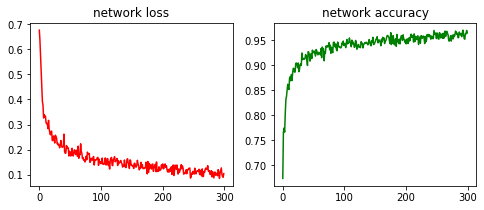

In [13]:
plt.figure(10, figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.title('network loss')
plt.plot(list(range(len(plt_loss))), plt_loss, 'r')
plt.subplot(1, 2, 2)
plt.title('network accuracy')
plt.plot(list(range(len(acc_))), acc_, 'g')
plt.savefig('./image/trainResult', dpi=400)
plt.show()

#### 测试在数据集上的实际准确率
    - 读取视频
    - 提取骨架
    - 特征增强
    - 预测，计算准确率

In [58]:
test_vedio = vvv

##### 读取视频
    - 输入视频地址，并配置是否使用关键帧和光流筛选，默认不使用
    - 返回视频序列，类型为ndarray

In [93]:
def read_vedio(vedioPath, useKeyFrame=False, useOptical=False):
    cap = cv2.VideoCapture(vedioPath)
    num_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # 获取要选择的帧
    index = list(range(num_frame))
    if useKeyFrame:
        pass

    # 获取要截选的区域
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    left, right = 0, width
    top, bottom = 0, height
    if useOptical:
        pass

    # 读取图片返回图片序列
    channel = 3
    # opencv 图片存储数据为uint8
    frameSeq = np.zeros((len(index), bottom-top, right-left, channel), dtype=np.uint8)
    num = 0
    for i in range(num_frame):
        if i in index:
            ret, frame = cap.read()
            frameSeq[num] = frame[top:bottom, left:right, :]
            num += 1
        # cv2.imshow('test', frame[top:bottom, left:right, :])
        # cv2.waitKey(30)

    return frameSeq


In [111]:
test_read = test_vedio
res = read_vedio(test_read)
print(res.dtype)
# for frame in res:
#     cv2.imshow('test', frame)
#     cv2.waitKey(50)
# cv2.destroyAllWindows()

uint8


#### 提取骨架

In [56]:
photo_dir = 'C:\\Users\\weightwater\\Desktop\\final\\openpose\\openpose\\openpose-1.7.0\\examples\\media\\COCO_val2014_000000000192.jpg'
model_dir = 'C:\\Users\\weightwater\\Desktop\\final\\openpose\\openpose\\openpose-1.7.0\\models'
sys_dir = 'C:\\Users\\weightwater\\Desktop\\final\\openpose\\openpose\\openpose-1.7.0\\build\\python\\openpose\\Debug'
os_dir = ';' + 'C:\\Users\\weightwater\\Desktop\\final\\openpose\\openpose\\openpose-1.7.0\\build\\x64\\Debug;' + 'C:\\Users\\weightwater\\Desktop\\final\\openpose\\openpose\\openpose-1.7.0\\build\\bin'

try:
    # Change these variables to point to the correct folder (Release/x64 etc.)
    sys.path.append(sys_dir)
    os.environ['PATH']  = os.environ['PATH'] + os_dir
    import pyopenpose as op
    params = dict()
    params["model_folder"] = model_dir
    params["net_resolution"] = '160x80'
    params['num_gpu'] = 1
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    print(e)
    sys.exit(-1)


In [57]:
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Image
datum = op.Datum()

In [114]:
def poseFromVedio(frameSeq, datum):
    for frame in frameSeq:
        
        datum.cvInputData = frame
        opWrapper.emplaceAndPop(op.VectorDatum([datum]))
        data = datum.poseKeypoints

        if data is not None:
            # cv2.imwrite('./poseResult/' + imageName + '.png', datum.cvOutputData)
            print('000')
            tmp = get_x(data.tolist())
            print('111')
            # tmp is tensor list
            print(type(tmp), type(tmp[0]))



In [117]:
poseFromVedio(res, datum)

000


IndexError: index 4 is out of bounds for dimension 0 with size 2